

Build **kNN** and **logistic regression** classifiers using sklearn library to predict "passed" (label variable) by using given data. 
- Start the project with data processing such as converting non-numeric values to numerical ones,  data normalization, etc.
- Explore and analyze the data using feature visualization such as correlation heatmap, and distribution plots by commenting on your findings. Choose min. 3 features for the visualization step. 
- Then, shuffle and split your data into train and test sets randomly, with a ratio of 70:30. (Write your own shuffling and spliting code, do not use predefined function train_test_split).
- Build your models (with proper comments and explanations) using the training set.
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance.
- Plot confusion matrices for your models over the test set, and comment on the outcomes. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate/comment the prediction performance of each classifier. 

Notes:

* Choose the optimal k value using Minkowski distance (by trying two different p-values) for the kNN model.


* **Don't forget to add comments to your code lines to explain how your program works, and your intentions behind it. Also, do not forget to comment on the outcomes and comparisons.** 

In [1]:
import pandas as pd
df = pd.read_csv("data.csv")
df.isna().values.any() #there is no null value

False

In [2]:
pd.set_option("display.max_columns", None) #displaying all collumns for understanding data
df.head(10)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,yes
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,yes
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,no
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,yes
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,yes


In [3]:
df = df.replace({"yes":1,"no":0})
df["school"] = df["school"].replace({"GP":1,"MS":0})
df["address"] = df["address"].replace({"U":1,"R":0})
df["famsize"] = df["famsize"].replace({"GT3":1,"LE3":0})
df["Mjob"] = df["Mjob"].replace({"at_home":0,"health":1,"services":2,"teacher":3,"other":4})
df["Fjob"] = df["Fjob"].replace({"at_home":0,"health":1,"services":2,"teacher":3,"other":4})
df["reason"] = df["reason"].replace({"home":0,"course":1,"reputation":2,"other":3})
df["guardian"] = df["guardian"].replace({"mother":0,"father":1, "other":2})
df["sex"] = df["sex"].replace({"F":0,"M":1})
df["Pstatus"] = df["Pstatus"].replace({"A":0,"T":1})


# converting non-numeric values to numerical ones


df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,1,0,18,1,1,0,4,4,0,3,1,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0
1,1,0,17,1,1,1,1,1,0,4,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0
2,1,0,15,1,0,1,1,1,0,4,3,0,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1
3,1,0,15,1,1,1,4,2,1,2,0,0,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1
4,1,0,16,1,1,1,3,3,4,4,0,1,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,0,0,2,2,2,2,1,2,1,2,2,0,1,1,0,1,1,0,0,5,5,4,4,5,4,11,0
391,0,1,17,1,0,1,3,1,2,2,1,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,3,1
392,0,1,21,0,1,1,1,1,4,4,1,2,1,1,3,0,0,0,0,0,1,0,0,5,5,3,3,3,3,3,0
393,0,1,18,0,0,1,3,2,2,4,1,0,3,1,0,0,0,0,0,0,1,1,0,4,4,1,3,4,5,0,1


<AxesSubplot:xlabel='passed', ylabel='[absences]'>

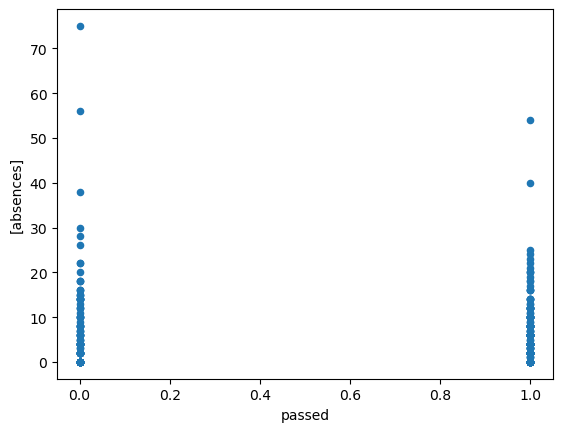

In [4]:
# The other columns are binary or can get max 5 different values so the only column that can have an outliner is absences
df.plot(x="passed",y=["absences"],kind="scatter")
#There are really few outliners so I will not drop them

<AxesSubplot:>

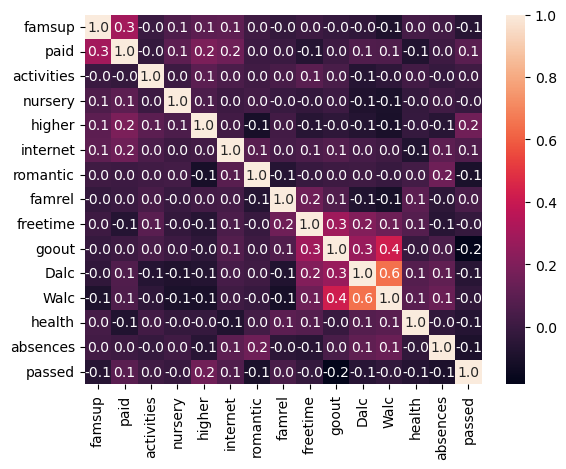

In [5]:
import seaborn as sb
corr = df[["famsup","paid","activities","nursery","higher","internet","romantic","famrel","freetime","goout","Dalc","Walc","health","absences","passed"]].corr()
sb.heatmap(corr, annot=True, fmt=".1f")


<AxesSubplot:>

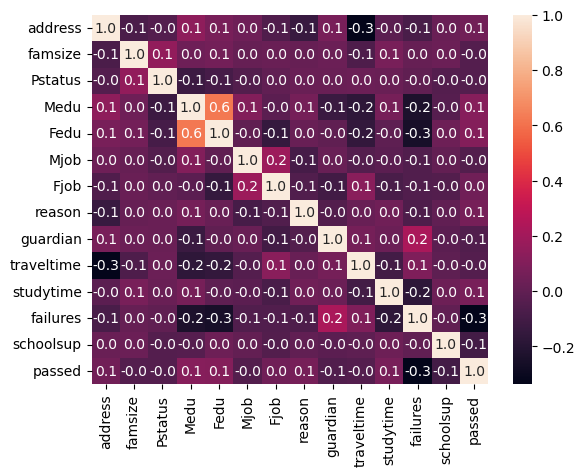

In [6]:
corr = df[["address","famsize","Pstatus","Medu","Fedu",'Mjob','Fjob','reason','guardian',"traveltime","studytime","failures","schoolsup","passed"]].corr()
sb.heatmap(corr, annot=True, fmt=".1f")
# With this two heatmap, I select the columns where |correlation| > 0.1 so I get rid of unnecessary data

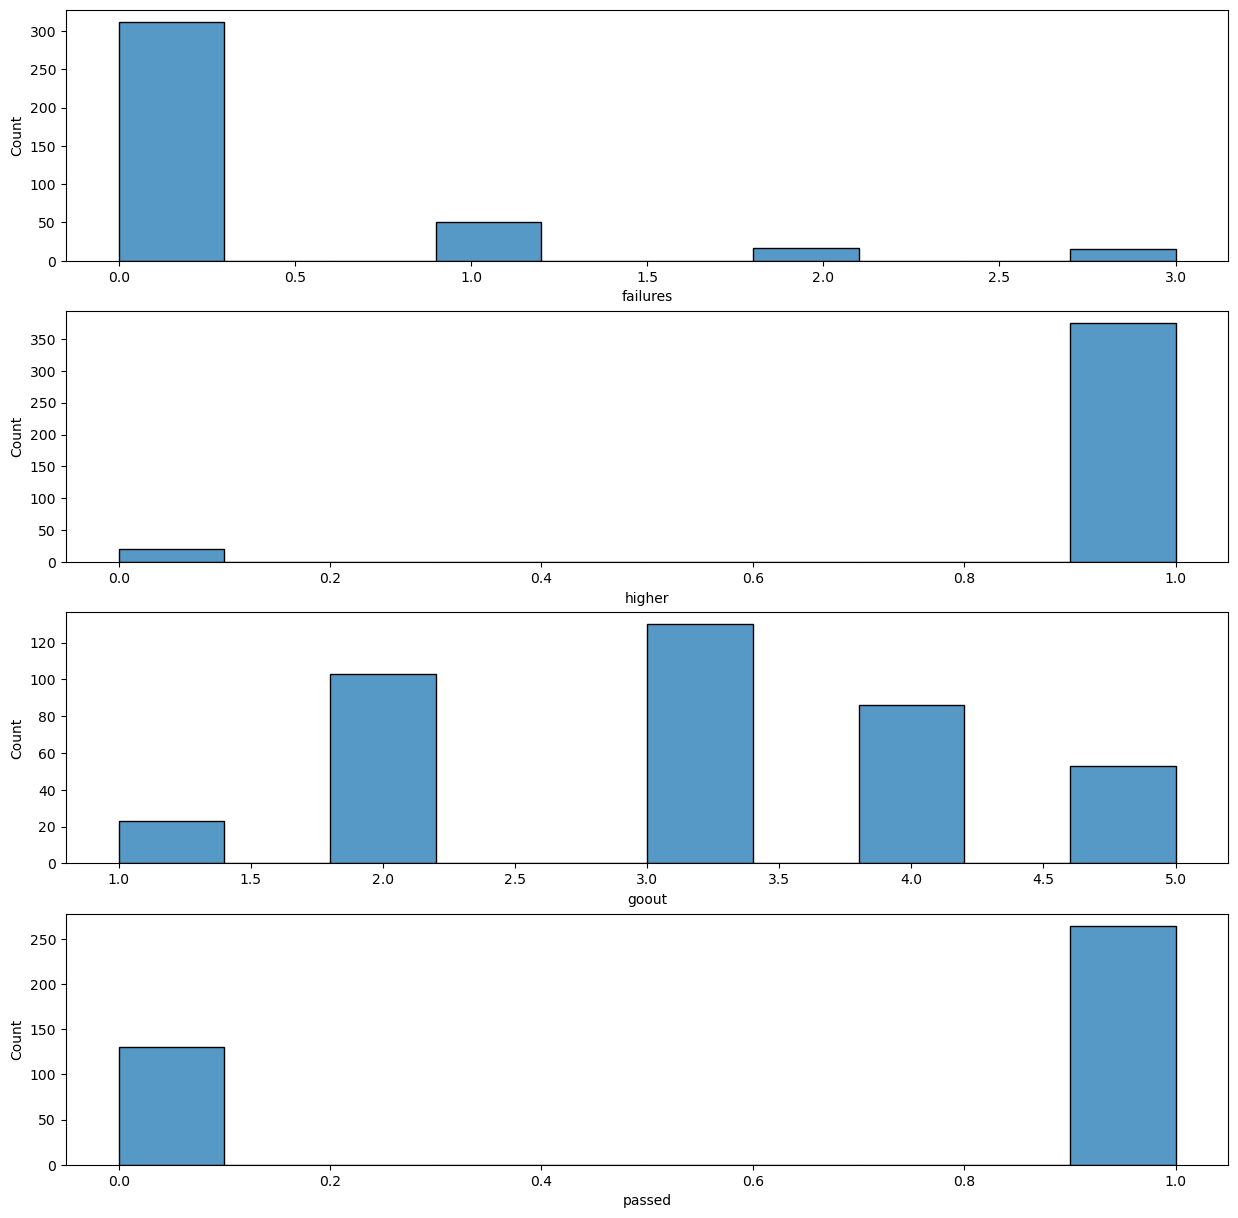

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.subplot(4, 1, 1)
sb.histplot(df['failures'])
plt.subplot(4, 1, 2)
sb.histplot(df['higher'])
plt.subplot(4, 1, 3)
sb.histplot(df['goout'])
plt.subplot(4, 1, 4)
sb.histplot(df['passed'])
plt.show()

In [8]:
df_processed = df.drop(columns=["famsize","Mjob","Fjob","traveltime","activities","nursery","famrel","freetime","Walc"])
df_processed

,school,sex,age,address,Pstatus,Medu,Fedu,reason,guardian,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,goout,Dalc,health,absences,passed
0,1,0,18,1,0,4,4,1,0,2,0,1,0,0,1,0,0,4,1,3,6,0
1,1,0,17,1,1,1,1,1,1,2,0,0,1,0,1,1,0,3,1,3,4,0
2,1,0,15,1,1,1,1,3,0,2,3,1,0,1,1,1,0,2,2,3,10,1
3,1,0,15,1,1,4,2,0,0,3,0,0,1,1,1,1,1,2,1,5,2,1
4,1,0,16,1,1,3,3,0,1,2,0,0,1,1,1,0,0,2,1,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,20,1,0,2,2,1,2,2,2,0,1,1,1,0,0,4,4,4,11,0
391,0,1,17,1,1,3,1,1,0,1,0,0,0,0,1,1,0,5,3,2,3,1
392,0,1,21,0,1,1,1,1,2,1,3,0,0,0,1,0,0,3,3,3,3,0
393,0,1,18,0,1,3,2,1,0,1,0,0,0,0,1,1,0,1,3,5,0,1


In [9]:
def train_test_split(dataFrame, yName):
    shuffeled = dataFrame.sample(frac=1, random_state=32)
    size = len(shuffeled.index)
    trainsize = (int) (size * 0.7)
    testsize = (int) (size * 0.3)
    trainX =  shuffeled.head(trainsize)
    testX =  shuffeled.tail(testsize)
    trainY = trainX[[yName]]
    trainX.pop(yName)
    testY = testX[[yName]]
    testX.pop(yName)
    return trainX, trainY, testX, testY


In [10]:
train_X, train_Y, test_X, test_Y = train_test_split(df_processed, "passed")

In [11]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
# solution code
bestMse=1
for k in range(1,31):
    regressor = KNN(n_neighbors=k, metric='minkowski') #k = 6 for minimum error
    regressor.fit(train_X,train_Y)
    predict = regressor.predict(test_X) #predicting y values to all x attributes
    predict_Y = pd.DataFrame(predict, columns= ['passed'])
    if(bestMse > mse(test_Y, predict_Y.round())):
        bestMse = mse(test_Y, predict_Y.round())
        bestk = k
        bestRegressor = regressor

In [12]:
predict = bestRegressor.predict(test_X) #predicting y values to all x attributes
predict_Y_KNN = pd.DataFrame(predict, columns= ['passed'])
mse(test_Y, predict_Y_KNN)

0.19638604846617166

In [13]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(train_X, train_Y.values.ravel())
logisticPredict = logisticRegr.predict(test_X) #predicting y values to all x attributes
predict_Y_Logistic = pd.DataFrame(logisticPredict, columns= ['passed'])
print(mse(test_Y,predict_Y))


0.1919303201506591


In [14]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_Y, predict_Y_KNN.round()),accuracy_score(test_Y, logisticPredict))

0.7457627118644068 0.7033898305084746


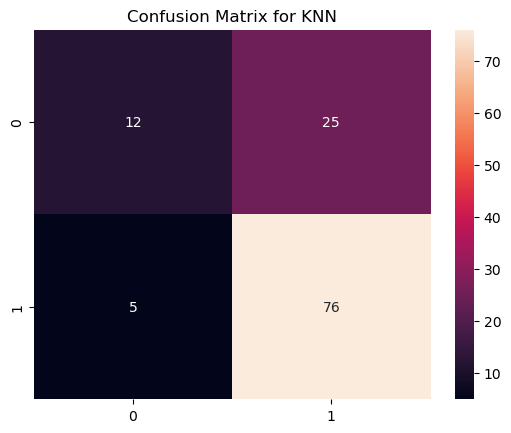

In [15]:
from sklearn.metrics import confusion_matrix
plt.figure()
confusion_matrixKNN = confusion_matrix(test_Y, predict_Y_KNN.round())
sb.heatmap(confusion_matrixKNN, annot=True)
plt.title("Confusion Matrix for KNN")
plt.show()


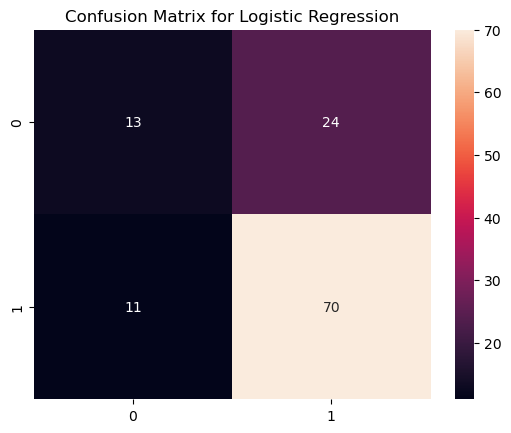

In [16]:
plt.figure()
confusion_matrixLP = confusion_matrix(test_Y, logisticPredict)
sb.heatmap(confusion_matrixLP, annot=True)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

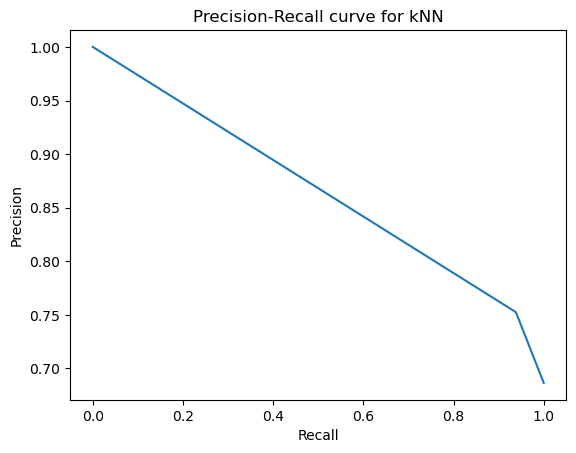

In [17]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(test_Y, predict_Y_KNN.round())
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve for kNN")
plt.show()

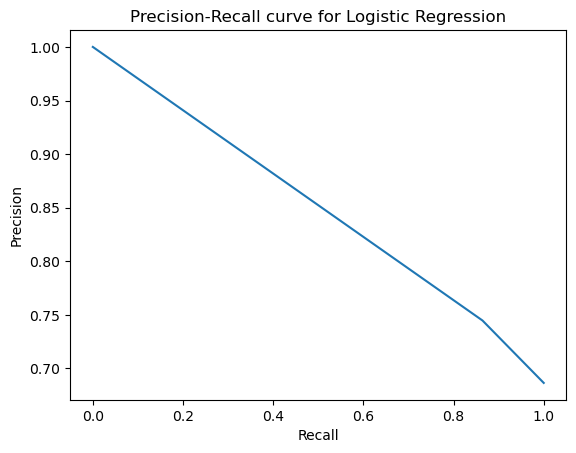

In [18]:
precision, recall, thresholds = precision_recall_curve(test_Y, logisticPredict)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve for Logistic Regression")
plt.show()